t-Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. It is extensively applied in image processing, NLP, genomic data and speech processing. To keep things simple, here's a brief overview of working of t-SNE:

* The algorithms starts by calculating the probability of similarity of points in high-dimensional space 
$$p_{j|i}=\frac{\exp(-||x_j - x_i||^2)}{\sum_{k\neq i} \exp(-||x_k - x_i||^2)},\ j\neq i,\ \ p_{i|i}=0$$
By sampling from $p_{.|i}$, we have more chance to get points $x_j$ near to $x_i$.
* Call $y_i$ the embedding of $x_i$. We define a similar distribution in the lower dimensional space:
$$q_{j|i}=\frac{\exp(-||y_j - y_i||^2)}{\sum_{k\neq i} \exp(-||y_k - y_i||^2)},\ j\neq i,\ \ q_{i|i}=0$$
* We want to find the best $y_i$. We define a cost function as follows
$$C=\sum_i KL(p_{.|i},q_{.|i})$$
where KL is KL divergence between two probability distributions and finally we solve by gradient descent
$$\text{argmin}_{y_i} C(y_1,\dots,y_n)$$

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.509910
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.387669
[t-SNE] KL divergence after 1000 iterations: 0.129141


[Text(0.5, 1.0, 'Iris data T-SNE projection')]

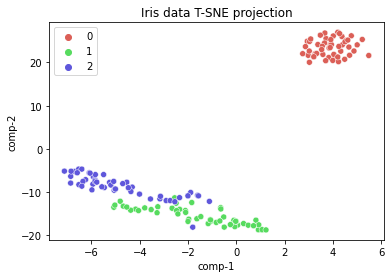

In [2]:
from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd

iris = load_iris()
x = iris.data
y = iris.target

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=df).set(title="Iris data T-SNE projection")

(3000, 28, 28)
(28, 28)


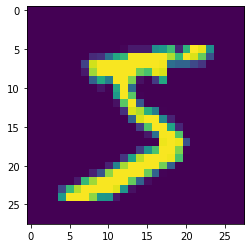

In [7]:
(x_train, y_train), (_ , _) = mnist.load_data()
x_train = x_train[:3000]
y_train = y_train[:3000]
print(x_train.shape) 
test_image=x_train[0,:,:]
print(test_image.shape)
import matplotlib.pyplot as plt
plt.imshow(test_image)

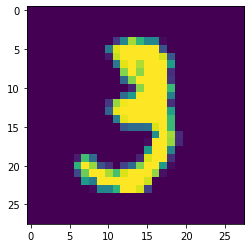

In [8]:
plt.imshow(x_train[10,:,:])

(3000, 28, 28)
(3000, 784)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.003s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 3000 samples in 0.530s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 607.882413
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.365952
[t-SNE] KL divergence after 1000 iterations: 1.271625


[Text(0.5, 1.0, 'MNIST data T-SNE projection')]

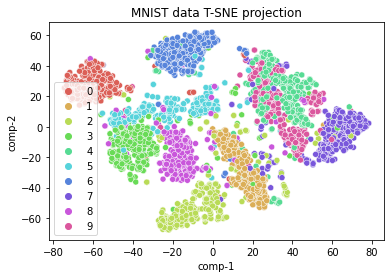

In [9]:

(x_train, y_train), (_ , _) = mnist.load_data()
x_train = x_train[:3000]
y_train = y_train[:3000]
print(x_train.shape) 
 
x_mnist = reshape(x_train, [x_train.shape[0], x_train.shape[1]*x_train.shape[2]])
print(x_mnist.shape)

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x_mnist)
 
df = pd.DataFrame()
df["y"] = y_train
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="MNIST data T-SNE projection")



**Mnist on 3d with t-SNE:**

Run the visualisation available [here](https://lvdmaaten.github.io/tsne/) 